In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

HSI = pd.read_excel('HSI.xlsx', parse_dates=["Date"], index_col="Date")
HSI.interpolate(method="spline", order=3, inplace=True)
HSI

,10 HK,101 HK,1038 HK,11 HK,12 HK,14 HK,142 HK,16 HK,17 HK,179 HK,...,1299 HK,151 HK,322 HK,1928 HK,135 HK,27 HK,2319 HK,823 HK,1 HK,1113 HK
Date,,,,,,,,,,,,,,,,,,,,,
2001-02-01,7.800000,8.950000,12.350000,103.000000,31.330000,13.900000,2.274000,82.250000,9.530000,55.800000,...,NaN,NaN,0.870000,NaN,0.43000,0.520000,NaN,NaN,59.618000,NaN
2001-02-02,7.900000,9.250000,12.400000,102.500000,31.104000,13.900000,2.504000,80.750000,9.569000,53.400000,...,NaN,NaN,0.890000,NaN,0.43500,0.520000,NaN,NaN,58.753000,NaN
2001-02-05,7.850000,8.800000,12.350000,101.000000,30.729000,13.800000,2.572000,79.250000,9.177000,51.000000,...,NaN,NaN,0.880000,NaN,0.42500,0.520000,NaN,NaN,58.753000,NaN
2001-02-06,7.950000,8.900000,12.400000,102.000000,31.180000,13.950000,2.458000,80.000000,9.334000,52.800000,...,NaN,NaN,0.880000,NaN,0.42500,0.520000,NaN,NaN,58.753000,NaN
2001-02-07,8.000000,9.050000,12.800000,103.000000,31.856000,14.150000,2.366000,80.250000,9.412000,52.600000,...,NaN,NaN,0.870000,NaN,0.42000,0.520000,NaN,NaN,59.041000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-25,22.326968,14.444603,75.272290,132.578222,47.581482,32.126678,6.346403,93.499131,5.545312,24.468061,...,43.338405,4.592481,7.489581,30.987475,6.35076,28.816242,11.342328,45.814497,100.875712,49.096599
2016-03-28,22.850857,14.560123,74.769781,133.080970,47.745057,32.192848,6.335762,93.303967,5.455252,24.815969,...,44.037841,4.543919,7.392313,31.287327,6.37527,29.162228,11.330682,46.263659,101.112166,49.573566
2016-03-29,21.600000,14.560000,73.850000,134.800000,47.300000,31.900000,5.430000,92.750000,7.220000,23.450000,...,42.450000,5.420000,7.990000,31.200000,6.59000,29.100000,10.880000,45.650000,100.300000,49.250000


In [3]:
weekly_HSI = HSI.resample('W-FRI').last()
weekly_HSI.fillna(0, inplace=True)

monthly_HSI = HSI.resample('ME').last()
monthly_HSI.fillna(0, inplace=True)

daily_HSI = HSI
daily_HSI.fillna(0, inplace=True)

In [5]:
daily_return = np.log(daily_HSI/daily_HSI.shift(1)).replace(np.inf, 0).iloc[1:]
weekly_return = np.log(weekly_HSI/weekly_HSI.shift(1)).replace(np.inf, 0).iloc[1:]
monthly_return = np.log(monthly_HSI/monthly_HSI.shift(1)).replace(np.inf, 0).iloc[1:]

In [7]:
weekly_cov_matrix = weekly_return.cov()
weekly_cov_matrix
weekly_cov_matrix.to_csv('covHSI.csv', index=True)

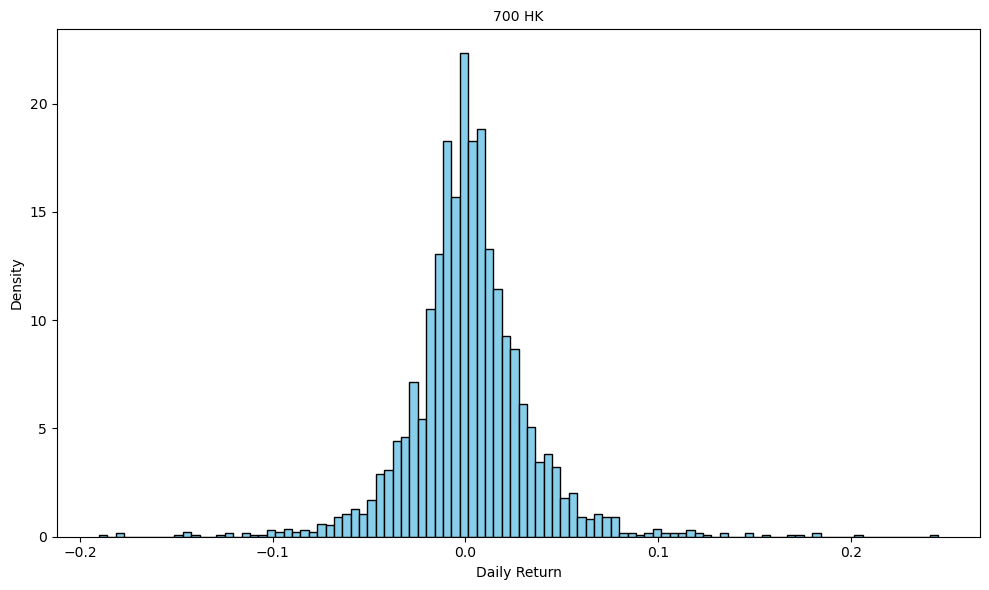

In [9]:
tencent_daily_returns = daily_return['700 HK'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(tencent_daily_returns, bins=100, density=True, color='skyblue', edgecolor='black')
plt.title('700 HK', fontsize=10)
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.tight_layout()

# Save the histogram as an image file
plt.savefig('histogram.png')
plt.show()

from docx import Document
from docx.shared import Inches

document = Document()
document.add_heading('Histogram of Daily Returns for Tencent (700 HK)', level=1)
document.add_paragraph('Below is the histogram of the daily returns for Tencent (700 HK):')

# Insert the histogram image into the document (adjust the width if needed).
document.add_picture('histogram.png', width=Inches(6))

# Save the document as 'Graph.doc'
document.save('Graph.doc')

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

HSI = pd.read_excel('HSI.xlsx', parse_dates=["Date"], index_col="Date")
HSI.interpolate(method="spline", order=3, inplace=True)
monthly_HSI = HSI.resample('ME').last().fillna(0)
monthly_return = np.log(monthly_HSI/monthly_HSI.shift(1)).replace(np.inf, 0).iloc[1:]
monthly_return

,10 HK,101 HK,1038 HK,11 HK,12 HK,14 HK,142 HK,16 HK,17 HK,179 HK,...,1299 HK,151 HK,322 HK,1928 HK,135 HK,27 HK,2319 HK,823 HK,1 HK,1113 HK
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,-0.217244,0.000000,-0.100644,-0.024558,-0.183595,-0.187932,-0.196972,-0.155109,-0.273881,-0.051092,...,NaN,NaN,0.213927,NaN,0.018349,-0.095310,NaN,NaN,-0.144931,NaN
2001-04-30,0.081662,-0.035048,0.019291,0.014110,-0.091129,-0.119333,-0.026332,-0.031268,0.018236,0.195397,...,NaN,NaN,-0.416711,NaN,0.255825,0.074512,NaN,NaN,0.082612,NaN
2001-05-31,-0.003884,0.011792,-0.027165,-0.059315,0.004359,-0.020851,-0.124347,0.007498,-0.018236,-0.106707,...,NaN,NaN,0.256368,NaN,0.214179,0.038816,NaN,NaN,-0.043627,NaN
2001-06-30,0.026847,0.051587,0.065032,-0.078118,-0.050739,-0.034571,0.018194,-0.034969,-0.051273,-0.236143,...,NaN,NaN,0.008658,NaN,-0.146603,-0.036368,NaN,NaN,0.000000,NaN
2001-07-31,0.019673,-0.039891,-0.072969,0.089612,0.061649,-0.083819,-0.086719,-0.025227,-0.117045,0.063370,...,NaN,NaN,-0.099630,NaN,-0.054067,0.000000,NaN,NaN,-0.095602,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-30,-0.062291,-0.046270,-0.060711,-0.014836,-0.039019,-0.050606,-0.096818,-0.086399,-0.073645,-0.012379,...,0.015234,-0.058981,-0.171569,-0.071788,0.068572,-0.156029,-0.199196,0.014958,-0.046118,-0.075238
2015-12-31,-0.048412,-0.029052,0.055848,0.048621,-0.005249,-0.031010,0.064279,-0.017999,-0.007802,-0.056740,...,0.006459,-0.053976,-0.014363,0.013270,0.016070,0.069870,0.024020,-0.016035,0.028116,-0.002972
2016-01-31,-0.165792,-0.212711,0.013831,-0.137899,-0.123060,-0.056695,0.040043,-0.110597,-0.195462,-0.145712,...,-0.083895,-0.127361,-0.228583,0.009372,-0.175389,-0.014418,-0.162891,-0.045187,-0.082156,-0.190690


In [13]:
mean_return = monthly_return.mean().values
omega = monthly_return.cov()
omega_inv = np.linalg.inv(omega)
ones = np.ones(len(mean_return))

A = np.dot(mean_return.T, np.dot(omega_inv, mean_return)) # A = μ.T @ Ω^(-1) @ μ
B = np.dot(mean_return.T, np.dot(omega_inv, np.ones(len(mean_return)))) # B = μ.T @ Ω^(-1) @ 1
C = np.dot(ones.T, np.dot(np.linalg.inv(omega), ones)) # C = 1.T @ Ω^(-1) @ 1
print("Matrix A:", A)
print("Matrix B:", B)
print("Matrix C:", C)

Matrix A: 0.920055660247521
Matrix B: 14.743889428834448
Matrix C: 2027.9207180806784


In [15]:
# Portfolio return range (mu_p) in steps of 0.5% (0.005)
mu_p_range = np.arange(0.005, 0.101, 0.005)

# Precompute constant denominator (AC - B^2)
denominator = A * C - B**2

A = np.dot(mean_return.T, np.dot(omega_inv, mean_return))
B = np.dot(mean_return.T, np.dot(omega_inv, np.ones(len(mean_return))))
C = np.dot(ones.T, np.dot(np.linalg.inv(omega), ones))

# Prepare a list to store results in long format
results = []

# Compute lambda, gamma, and alpha_p for each mu_p
for mu_p in mu_p_range:
    # Compute lambda and gamma
    lambda_val = (mu_p * C - B) / denominator
    gamma_val = (A - B * mu_p) / denominator

    # Compute alpha_p
    alpha_p = lambda_val * np.dot(omega_inv, mean_return) + gamma_val * np.dot(omega_inv, ones)

    # Compute sigma_p (standard deviation)
    sigma_p_squared = (C * (mu_p - B/C)**2 + (A*C - B**2)/C) / denominator
    sigma_p = np.sqrt(sigma_p_squared)

    # Save results in long format for each stock
    for stock_index, weight in enumerate(alpha_p):
        results.append({"mu_p": mu_p, "lambda": lambda_val, "gamma": gamma_val, 
                        "Stock": f"Stock{stock_index+1}", "Weight": weight, "sigma_p": sigma_p})

# Convert results to a DataFrame
df_long = pd.DataFrame(results)

# Display the long format DataFrame
print(df_long)

       mu_p    lambda     gamma    Stock    Weight   sigma_p
0     0.005 -0.002793  0.000513   Stock1 -0.104870  0.022349
1     0.005 -0.002793  0.000513   Stock2 -0.192516  0.022349
2     0.005 -0.002793  0.000513   Stock3  0.136826  0.022349
3     0.005 -0.002793  0.000513   Stock4  0.092821  0.022349
4     0.005 -0.002793  0.000513   Stock5  0.013821  0.022349
...     ...       ...       ...      ...       ...       ...
1355  0.100  0.114078 -0.000336  Stock64  0.449069  0.105221
1356  0.100  0.114078 -0.000336  Stock65 -0.442350  0.105221
1357  0.100  0.114078 -0.000336  Stock66 -0.416650  0.105221
1358  0.100  0.114078 -0.000336  Stock67  0.523250  0.105221
1359  0.100  0.114078 -0.000336  Stock68  0.052382  0.105221

[1360 rows x 6 columns]


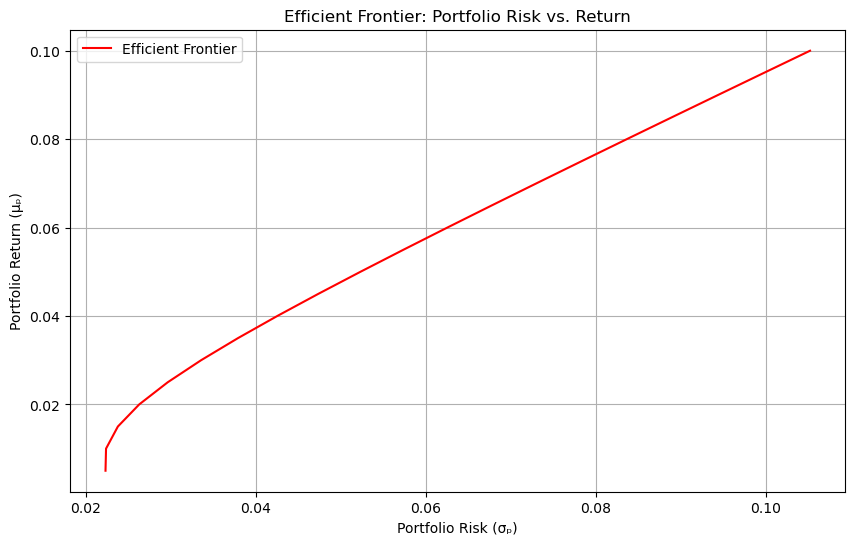

In [17]:
# Extract unique (mu_p, sigma_p) pairs
unique_pairs = df_long[["mu_p", "sigma_p"]].drop_duplicates()

# Sort by mu_p for proper plotting
unique_pairs = unique_pairs.sort_values(by="mu_p")

# Plot mu_p against sigma_p
plt.figure(figsize=(10, 6))
plt.plot(unique_pairs["sigma_p"], unique_pairs["mu_p"], color="red", label="Efficient Frontier")
plt.title("Efficient Frontier: Portfolio Risk vs. Return")
plt.xlabel("Portfolio Risk (σₚ)")
plt.ylabel("Portfolio Return (μₚ)")
plt.grid(True)
plt.legend()
plt.show()

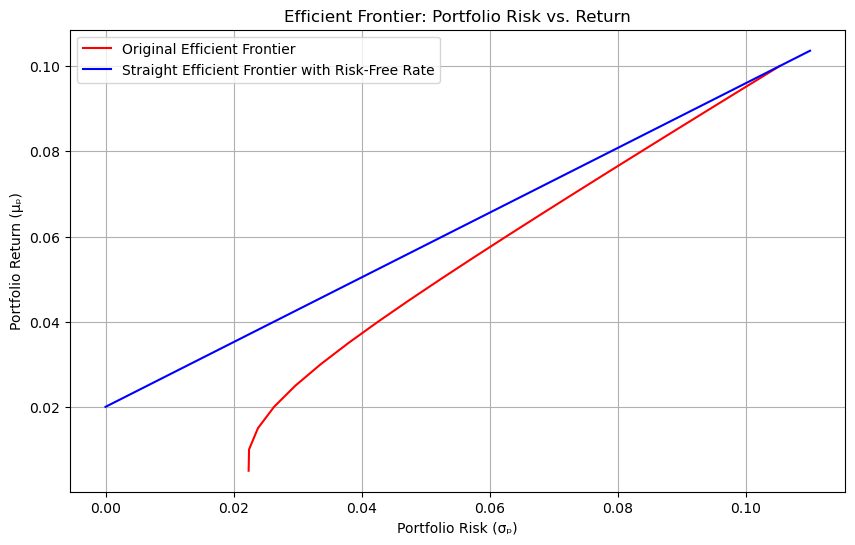

In [19]:
mean_return = monthly_return.mean().values
omega = monthly_return.cov()
omega_inv = np.linalg.inv(omega)
ones = np.ones(len(mean_return))

A = np.dot(mean_return.T, np.dot(omega_inv, mean_return))   # (R' Ω⁻¹ R)
B = np.dot(mean_return.T, np.dot(omega_inv,np.ones(len(mean_return))))  #(R' Ω⁻¹ 1)
C = np.dot(ones.T, np.dot(np.linalg.inv(omega),ones)) #(1' Ω⁻¹ 1)
denominator = A*C - B**2

results = []
mu_p_range = np.arange(0.005, 0.101, 0.005)
for mu_p in mu_p_range:
    lambda_value = (mu_p * C - B) / denominator
    gamma_value = (A - B * mu_p) / denominator
    weight = lambda_value * np.dot(omega_inv, mean_return) + gamma_value * np.dot(omega_inv, ones)
    sigma_p_squared = (C * (mu_p - B/C) ** 2 + (A * C - B ** 2) / C) / denominator
    sigma_p = np.sqrt(sigma_p_squared)
    results.append({"mu_p": mu_p, "sigma_p": sigma_p})

df_long_ = pd.DataFrame(results)
unique_pairs = df_long[["mu_p", "sigma_p"]].drop_duplicates().sort_values(by="mu_p")

risk_free_rate = 0.02
# Construct the straight efficient frontier with risk-free rate
risk_free_point = [0, risk_free_rate]  # (0, risk-free rate)
tangents = (unique_pairs["mu_p"].values - risk_free_rate) / unique_pairs["sigma_p"].values
tangent_slope = np.max(tangents)  # Get max tangent slope

# Calculate the straight efficient frontier
risk_free_sigma = np.arange(0, np.max(unique_pairs["sigma_p"]) + 0.01, 0.01)
efficient_frontier_with_risk_free = risk_free_rate + tangent_slope * risk_free_sigma # μₚ = rf + Sharpe * σₚ

# Plot both efficient frontiers
plt.figure(figsize=(10, 6))
plt.plot(unique_pairs["sigma_p"], unique_pairs["mu_p"], color="red", label="Original Efficient Frontier")
plt.plot(risk_free_sigma, efficient_frontier_with_risk_free, color="blue", label="Straight Efficient Frontier with Risk-Free Rate")
plt.title("Efficient Frontier: Portfolio Risk vs. Return")
plt.xlabel("Portfolio Risk (σₚ)")
plt.ylabel("Portfolio Return (μₚ)")
plt.grid(True)
plt.legend()
plt.show()

In [21]:
weight_withoutRf = []
ones = np.ones(len(mean_return))

mu_p_range = np.arange(0.005, 0.101, 0.005)
for mu_p in mu_p_range:
    # Compute lambda and gamma
    lambda_val = (mu_p * C - B) / denominator
    gamma_val = (A - B * mu_p) / denominator

    # Compute alpha_p
    alpha_p = lambda_val * np.dot(omega_inv, mean_return) + gamma_val * np.dot(omega_inv, ones)

    # Save results in long format for each stock
    for stock_index, weight in enumerate(alpha_p):
        weight_withoutRf.append({"mu_p": mu_p, "Stock": f"Stock{stock_index+1}", "Weight": weight})

weight_withoutRf_df = pd.DataFrame(weight_withoutRf)
weight_withoutRf_df.to_csv("weight_withoutRf.csv", index=False)
print(weight_withoutRf_df)

       mu_p    Stock    Weight
0     0.005   Stock1 -0.104870
1     0.005   Stock2 -0.192516
2     0.005   Stock3  0.136826
3     0.005   Stock4  0.092821
4     0.005   Stock5  0.013821
...     ...      ...       ...
1355  0.100  Stock64  0.449069
1356  0.100  Stock65 -0.442350
1357  0.100  Stock66 -0.416650
1358  0.100  Stock67  0.523250
1359  0.100  Stock68  0.052382

[1360 rows x 3 columns]


In [23]:
weight_withRf = []
ones = np.ones(len(mean_return))

mu_p_range = np.arange(0.005, 0.105, 0.005)
r_f = 0.02

excess_return = mean_return - r_f*ones
tangency_weight = np.dot(omega_inv, excess_return)
tangency_weight /= np.dot(ones.T, tangency_weight)
tangent_slope = np.max(tangents)  # Get max tangent slope

mu_t = np.dot(tangency_weight, mean_return)

for mu_p in mu_p_range:
    rf_weight = (mu_p-r_f)/tangent_slope
    risky_weight = (1-r_f)*tangency_weight
    weight_withRf.append({"mu_p": mu_p, "Stock": "Risk-free", "Weight": rf_weight})
    for stock_index, weight in enumerate(risky_weight): 
        weight_withRf.append({"mu_p": mu_p, "Stock": f"Stock{stock_index + 1}", "Weight": weight})

weight_withRf_df = pd.DataFrame(weight_withRf)
weight_withRf_df.to_csv("weight_withRf.csv", index=False)
print(weight_withRf_df)

       mu_p      Stock    Weight
0     0.005  Risk-free -0.019729
1     0.005     Stock1 -0.248114
2     0.005     Stock2 -0.019491
3     0.005     Stock3 -0.003395
4     0.005     Stock4  0.641910
...     ...        ...       ...
1375  0.100    Stock64 -0.282947
1376  0.100    Stock65  0.304282
1377  0.100    Stock66  0.376872
1378  0.100    Stock67 -0.272336
1379  0.100    Stock68  0.008011

[1380 rows x 3 columns]
